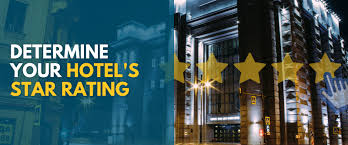

To develop a machine learning model that can accurately predict the aggregate rating of a restaurant using various features such as **'Country Code', 'Average Cost for two', 'Has Table booking', 'Has Online delivery',
           'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes**. The goal is to understand how different factors influence customer ratings and to enable data-driven decision-making for restaurant improvement.This model can assist restaurant owners and platforms in optimizing services and enhancing customer satisfaction.

# **Importing all the necessary libraries.**

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

# **mounting file from google drive and  Preprocessing**

In [71]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset .csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [73]:
df.shape

(9551, 21)

In [74]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


**Preprocessing - Select Columns**

In [75]:
columns = ['Country Code', 'Average Cost for two', 'Has Table booking', 'Has Online delivery',
           'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

**Drop rows with missing values**

In [76]:
df = df[columns]
df.dropna(inplace=True)

In [77]:
df.head()

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,1100,Yes,No,3,4.8,Dark Green,Excellent,314
1,162,1200,Yes,No,3,4.5,Dark Green,Excellent,591
2,162,4000,Yes,No,4,4.4,Green,Very Good,270
3,162,1500,No,No,4,4.9,Dark Green,Excellent,365
4,162,1500,Yes,No,4,4.8,Dark Green,Excellent,229


In [78]:
country_counts = df['Country Code'].value_counts()
print(country_counts)
print("\nUnique Country Codes:")
print(df['Country Code'].unique())
print("\nNumber of unique Country Codes:")
print(df['Country Code'].nunique())

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

Unique Country Codes:
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]

Number of unique Country Codes:
15


**country code with parllel country name**

In [79]:
country_codes = {
    1: 'United States',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'Singapore',
    189: 'South Africa',
    191: 'Sri Lanka',
    208: 'Turkey',
    214: 'UAE',
    215: 'United Kingdom',
    216: 'India'
}
df['Country Name'] = df['Country Code'].map(country_codes)
df.head()


,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Name
0,162,1100,Yes,No,3,4.8,Dark Green,Excellent,314,Philippines
1,162,1200,Yes,No,3,4.5,Dark Green,Excellent,591,Philippines
2,162,4000,Yes,No,4,4.4,Green,Very Good,270,Philippines
3,162,1500,No,No,4,4.9,Dark Green,Excellent,365,Philippines
4,162,1500,Yes,No,4,4.8,Dark Green,Excellent,229,Philippines


# **EDA**

In [80]:
df.head()

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Name
0,162,1100,Yes,No,3,4.8,Dark Green,Excellent,314,Philippines
1,162,1200,Yes,No,3,4.5,Dark Green,Excellent,591,Philippines
2,162,4000,Yes,No,4,4.4,Green,Very Good,270,Philippines
3,162,1500,No,No,4,4.9,Dark Green,Excellent,365,Philippines
4,162,1500,Yes,No,4,4.8,Dark Green,Excellent,229,Philippines


**bar chart of Has Table booking,Has Online delivery**

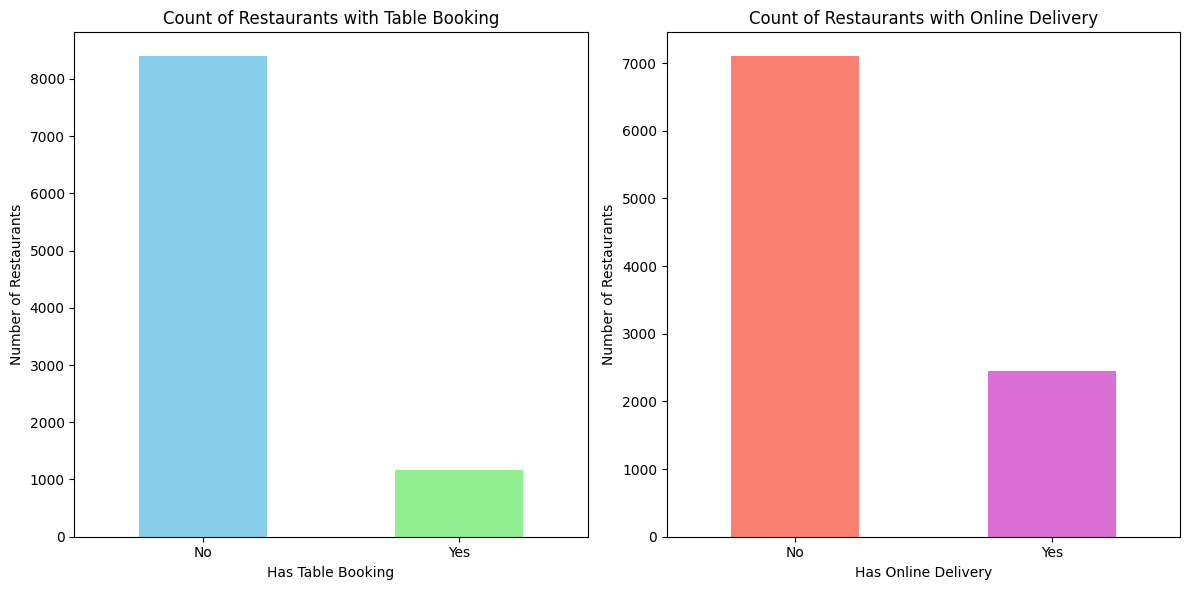

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plotting 'Has Table booking'
df['Has Table booking'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'lightgreen'])
axes[0].set_title('Count of Restaurants with Table Booking')
axes[0].set_xlabel('Has Table Booking')
axes[0].set_ylabel('Number of Restaurants')
axes[0].tick_params(axis='x', rotation=0)
# Plotting 'Has Online delivery'
df['Has Online delivery'].value_counts().plot(kind='bar', ax=axes[1], color=['salmon', 'orchid'])
axes[1].set_title('Count of Restaurants with Online Delivery')
axes[1].set_xlabel('Has Online Delivery')
axes[1].set_ylabel('Number of Restaurants')
axes[1].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

**Pie chart of Rating color**

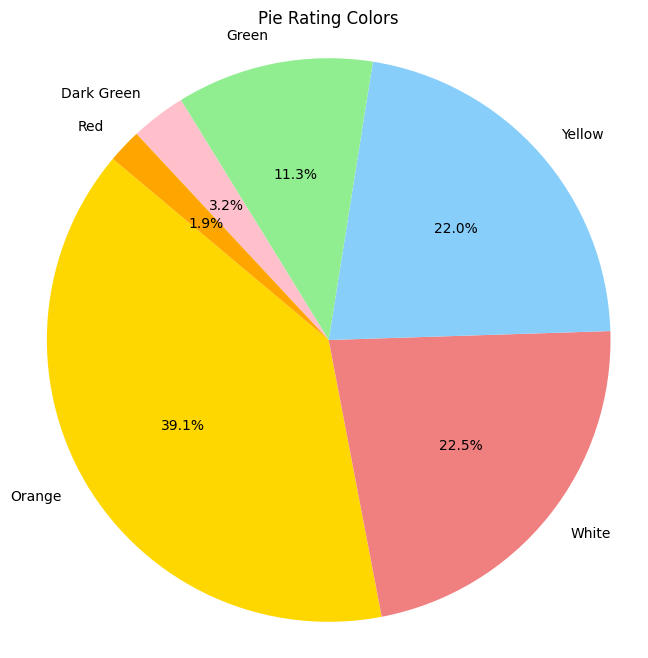

In [82]:
rating_color_counts = df['Rating color'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_color_counts, labels=rating_color_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'orange'])
plt.title('Pie Rating Colors')
plt.axis('equal')
plt.show()

**Bar chart of Rating text**

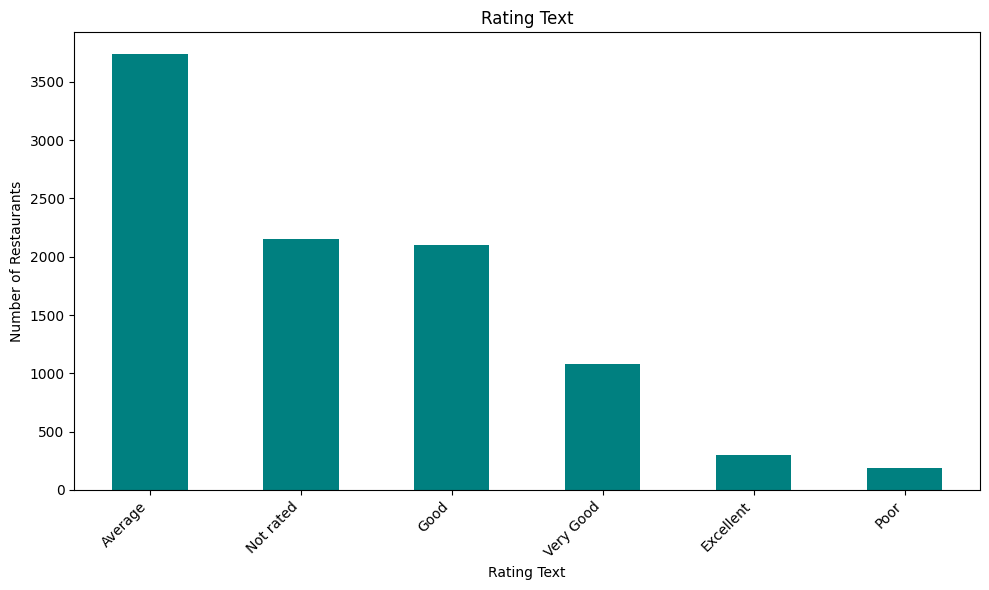

In [83]:
rating_text_counts = df['Rating text'].value_counts()
plt.figure(figsize=(10, 6))
rating_text_counts.plot(kind='bar', color='teal')
plt.title('Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ***Model Building ***

**Encoding - Use OneHotEncoder for categorical columns**

In [84]:
categorical_features = ['Has Table booking', 'Has Online delivery', 'Rating text']
numerical_features = ['Country Code', 'Average Cost for two', 'Price range', 'Votes']

**Standardization**

In [85]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

**Define Target Variable**

In [86]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

**Split Data (70% train, 15% validation, 15% test)**

In [87]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Define Models and Hyperparameter Grids**

In [88]:
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'param_grid': {'model__fit_intercept': [True, False]},
        'key_param': 'model__fit_intercept'
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=42),
        'param_grid': {
            'model__max_depth': [None, 5, 10, 15],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        },
        'key_param': 'model__max_depth'
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'param_grid': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5],
            'model__min_samples_leaf': [1, 2]
        },
        'key_param': 'model__n_estimators'
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'param_grid': {
            'model__n_neighbors': [3, 5, 7, 10],
            'model__weights': ['uniform', 'distance']
        },
        'key_param': 'model__n_neighbors'
    }
}

**Function to Tune, Evaluate, Plot Loss, Plot Actual vs Predicted, and Save Model**

In [89]:
 def process_model(model_name, config):
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    # Hyperparameter Tuning
    grid_search = GridSearchCV(
        pipeline,
        config['param_grid'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)

    # Print best parameters
    print(f"\nBest Parameters for {model_name}: {grid_search.best_params_}")

    # Get best model
    best_model = grid_search.best_estimator_

    # Evaluate Model
    def evaluate(y_true, y_pred, dataset_name):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f"{model_name} {dataset_name}: MAE={mae:.4f}, MSE={mse:.4f}, R²={r2:.4f}")

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)

    evaluate(y_train, y_train_pred, "Train")
    evaluate(y_val, y_val_pred, "Validation")
    evaluate(y_test, y_test_pred, "Test")

    # Plot Loss Function Curve (using cross-validation results)
    cv_results = pd.DataFrame(grid_search.cv_results_)
    key_param = config['key_param']
    # Corrected: Use .values instead of .data to access the numpy array from the pandas Series
    param_values = cv_results[f'param_{key_param}'].values
    train_mse = -cv_results['mean_train_score']
    val_mse = -cv_results['mean_test_score']

    # Handle non-numeric parameters (e.g., None for max_depth)
    param_values_numeric = [float(val) if val is not None else 0 for val in param_values]
    sorted_idx = np.argsort(param_values_numeric)

    plt.figure(figsize=(8, 6))
    plt.plot(np.array(param_values)[sorted_idx], train_mse[sorted_idx], label='Train MSE')
    plt.plot(np.array(param_values)[sorted_idx], val_mse[sorted_idx], label='Validation MSE')
    plt.xlabel(key_param.split('__')[-1])
    plt.ylabel('Mean Squared Error')
    plt.title(f'{model_name} Loss Curve')
    plt.legend()
    plt.savefig(f'{model_name}_loss_curve.png')
    plt.close()

    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Aggregate Rating')
    plt.ylabel('Predicted Aggregate Rating')
    plt.title(f'{model_name} Actual vs Predicted')
    plt.savefig(f'{model_name}_actual_vs_predicted.png')
    plt.close()

    #Save Model
    joblib.dump(best_model, f'{model_name}_best_model.pkl')
    print(f"{model_name} model saved as '{model_name}_best_model.pkl'")

# Run for All Models
for model_name, config in models.items():
    process_model(model_name, config)


Best Parameters for LinearRegression: {'model__fit_intercept': True}
LinearRegression Train: MAE=0.1278, MSE=0.0317, R²=0.9863
LinearRegression Validation: MAE=0.1288, MSE=0.0313, R²=0.9858
LinearRegression Test: MAE=0.1280, MSE=0.0308, R²=0.9867
LinearRegression model saved as 'LinearRegression_best_model.pkl'

Best Parameters for DecisionTree: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
DecisionTree Train: MAE=0.1128, MSE=0.0276, R²=0.9881
DecisionTree Validation: MAE=0.1215, MSE=0.0303, R²=0.9862
DecisionTree Test: MAE=0.1210, MSE=0.0304, R²=0.9869
DecisionTree model saved as 'DecisionTree_best_model.pkl'

Best Parameters for RandomForest: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
RandomForest Train: MAE=0.1099, MSE=0.0263, R²=0.9886
RandomForest Validation: MAE=0.1211, MSE=0.0295, R²=0.9866
RandomForest Test: MAE=0.1202, MSE=0.0293, R²=0.9874
RandomForest model saved 

#**Example: Predicting with a Saved Model Linear Regression,Decision Tree,Random Forest,Knn**

In [90]:
loaded_model = joblib.load('LinearRegression_best_model.pkl')
new_data = pd.DataFrame({
    'Country Code': [162],
    'Average Cost for two': [1100],
    'Has Table booking': ['Yes'],
    'Has Online delivery': ['No'],
    'Price range': [3],
    'Rating text': ['Excellent'],
    'Votes': [314]
})
prediction = loaded_model.predict(new_data)
print(f"\nPredicted Aggregate Rating with LinearRegression: {prediction[0]:.4f}")


Predicted Aggregate Rating with LinearRegression: 4.6446


In [91]:
# Example: Predicting with a Saved Model
loaded_model = joblib.load('DecisionTree_best_model.pkl')
new_data = pd.DataFrame({
    'Country Code': [162],
    'Average Cost for two': [1100],
    'Has Table booking': ['Yes'],
    'Has Online delivery': ['No'],
    'Price range': [3],
    'Rating text': ['Excellent'],
    'Votes': [314]
})
prediction = loaded_model.predict(new_data)
print(f"\nPredicted Aggregate Rating with DecisionTree: {prediction[0]:.4f}")


Predicted Aggregate Rating with DecisionTree: 4.6750


In [92]:
# Example: Predicting with a Saved Model
loaded_model = joblib.load('RandomForest_best_model.pkl')
new_data = pd.DataFrame({
    'Country Code': [162],
    'Average Cost for two': [1100],
    'Has Table booking': ['YES'],
    'Has Online delivery': ['No'],
    'Price range': [3],
    'Rating text': ['Excellent'],
    'Votes': [314]
})
prediction = loaded_model.predict(new_data)
print(f"\nPredicted Aggregate Rating with RandomForest: {prediction[0]:.4f}")


Predicted Aggregate Rating with RandomForest: 4.6338


In [93]:
# Example: Predicting with a Saved Model
loaded_model = joblib.load('KNN_best_model.pkl')
new_data = pd.DataFrame({
    'Country Code': [162],
    'Average Cost for two': [1100],
    'Has Table booking': ['Yes'],
    'Has Online delivery': ['No'],
    'Price range': [3],
    'Rating text': ['Excellent'],
    'Votes': [314]
})
prediction = loaded_model.predict(new_data)
print(f"\nPredicted Aggregate Rating with KNN: {prediction[0]:.4f}")


Predicted Aggregate Rating with KNN: 4.5800
